### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [2]:
# http://lib.stat.cmu.edu/datasets/boston

In [3]:
%matplotlib inline
# Pandas and numpy for data handling
import pandas as pd
import numpy as np
from scipy import stats

# Statsmodels for fitting
import statsmodels.api as sm

# Plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.gridspec as gridspec
import matplotlib.style as style
style.use('fivethirtyeight')

# Import scikit learn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Folium for map plotting
#import folium
#from folium.plugins import HeatMap

In [4]:
def print_scores(y_test, y_pred, model=''):
    print('---------------------------------\n')
    print('Scores for model: {}'.format(model))
    print('---------------------------------\n')
    print('MSE Error: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2-value: {}'.format(r2_score(y_test, y_pred)))

In [5]:
# Extracted from the boston_house_prices.csv file
cols = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD', 
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV'
]

fname = pd.read_csv('Boston_House_Prices/boston_house_prices.csv', sep='\s+', header = None)

oklist = []

for row in range(1012):

    if row % 2 == 0:
        rowa = fname.iloc[row,]
        row = row + 1
        rowb = fname.iloc[row,]

        new_row = rowa.append(rowb)
        clean_list = new_row.iloc[0:14].tolist()
        oklist.append(clean_list)

df = pd.DataFrame(oklist, columns=cols)
df_back = df.copy()

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
with open('Boston_House_Prices/boston_house_prices.md') as f:
    desc = f.read()
print(desc)

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
print(desc)

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

In [13]:
df.isnull().sum().sort_values(ascending=False)

MEDV       0
LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64

In [14]:
df.isna().sum().sort_values(ascending=False)

MEDV       0
LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64

In [15]:
missing_vals = df.isna().sum().sort_values(ascending=False)
missing_vals_per = df.isna().sum().sort_values(ascending=False)/len(df)
missing_vals_overview = pd.concat([missing_vals, missing_vals_per], axis=1)
missing_vals_overview.columns = ['total', 'percent']
missing_vals_overview

,total,percent
MEDV,0,0.0
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0


### 'MEDV' column

In [16]:
df['MEDV'].value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
15.6     5
21.4     5
13.8     5
21.2     5
20.0     5
17.8     5
23.9     5
22.6     5
22.2     5
24.4     4
23.2     4
23.8     4
19.1     4
20.3     4
13.4     4
19.9     4
27.5     4
22.8     4
22.9     4
18.9     4
        ..
12.3     1
37.6     1
29.4     1
12.6     1
22.1     1
31.1     1
48.3     1
26.2     1
11.0     1
9.5      1
12.0     1
17.7     1
44.8     1
35.1     1
32.4     1
42.3     1
28.2     1
31.2     1
33.3     1
37.2     1
28.6     1
15.1     1
17.3     1
6.3      1
39.8     1
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: MEDV, Length: 229, dtype: int64

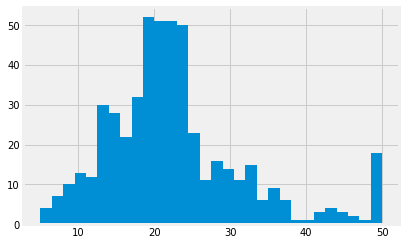

In [17]:
df['MEDV'].hist(bins=30)

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


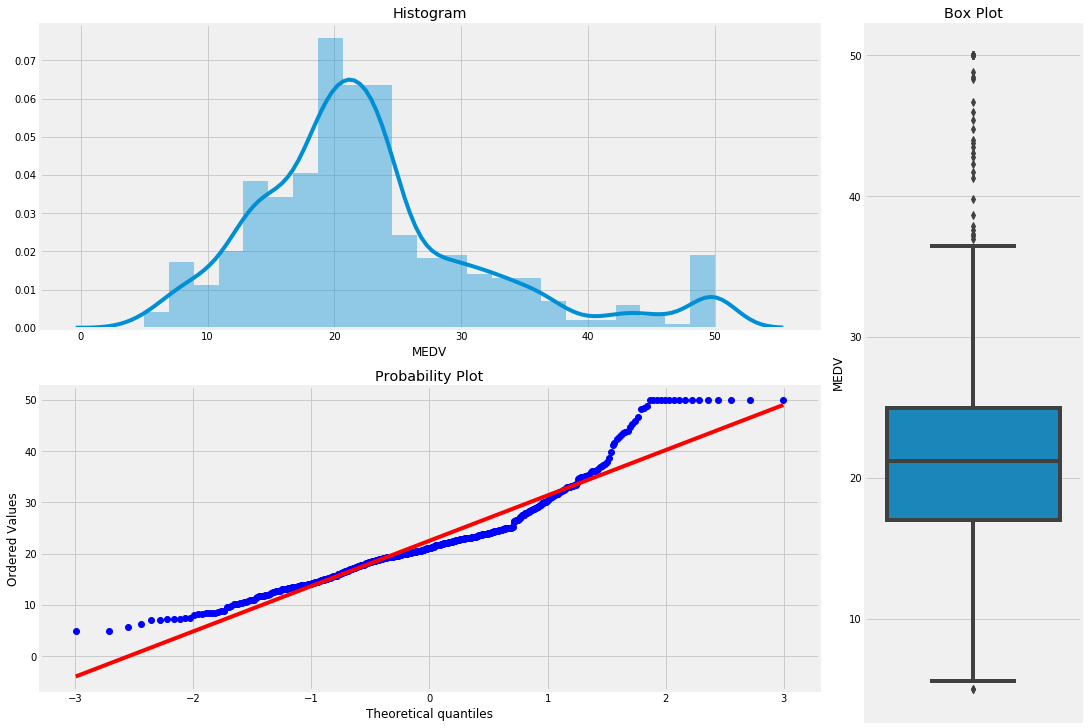

In [18]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(df['MEDV'], norm_hist=False, ax = ax1)

ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('QQ_plot')
stats.probplot(df['MEDV'], plot = ax2)

ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(df['MEDV'], orient='v', ax = ax3)

In [19]:
#df['log_price'] = log_price

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text xticklabel objects>)

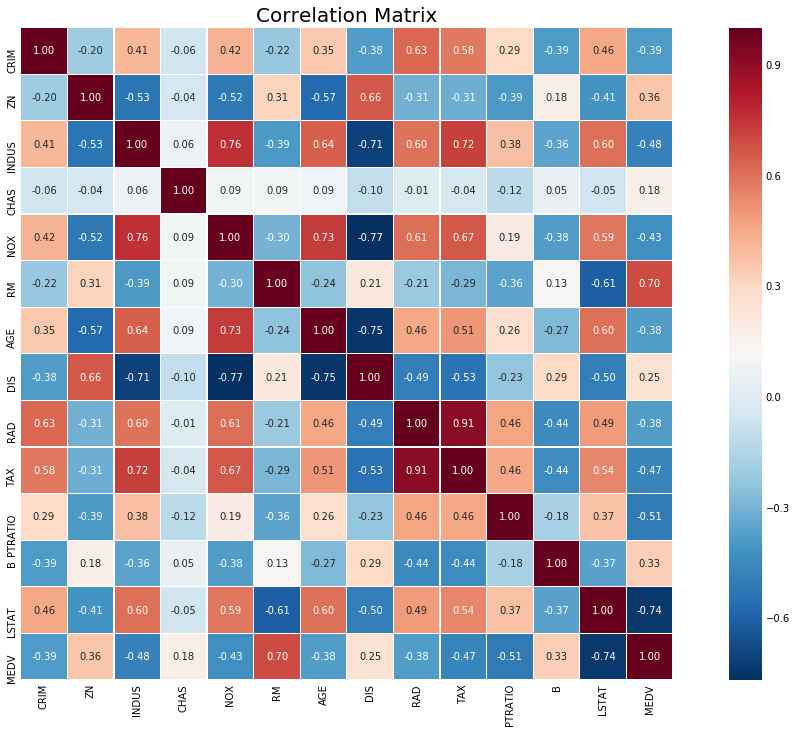

In [20]:
plt.figure(figsize=(18,12))
plt.title('Correlation Matrix', fontsize=20)
sns.heatmap(df.corr(), cmap='RdBu_r', square=True,
            annot=True, fmt='.2f', annot_kws={'size': 10}, 
            linewidths=0.25, linecolor='w')
plt.xticks(rotation=90)

In [21]:
df.corr()['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [22]:
print(desc)

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

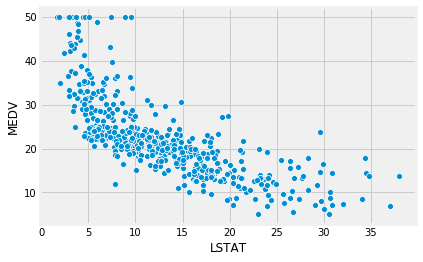

In [23]:
sns.scatterplot(y='MEDV', x='LSTAT', data=df)

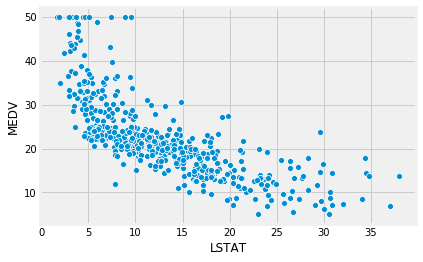

In [24]:
sns.scatterplot(y='MEDV', x='LSTAT', data=df)

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


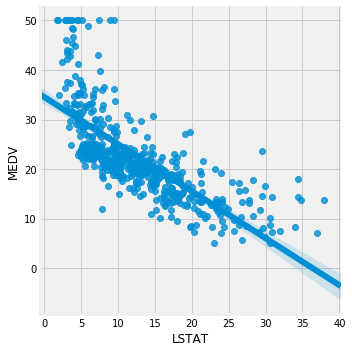

In [25]:
sns.lmplot(y='MEDV', x='LSTAT', data=df)

In [26]:
#X = df[[x for x in df.columns if x not in ['MEDV']]].values
X = df[['LSTAT']].values
#X = X[:, np.newaxis]
y = df[['MEDV']].values
#X = np.ndarray(data=X, shape=(13,506))
#y = np.ndarray(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [28]:
lin_reg = LinearRegression()
pred = lin_reg.fit(X_train, y_train)

y_pred = pred.predict(X_test)

In [29]:
print_scores(y_test, y_pred, 'Lin. Regr')

---------------------------------

Scores for model: Lin. Regr
---------------------------------

MSE Error: 46.33630536002592
R2-value: 0.43095672846187616


In [30]:
# Polynomial Regression

deg = 5
poly_reg = PolynomialFeatures(degree=deg)
X_poly_train = poly_reg.fit_transform(X_train)
reg = LinearRegression()
poly_pred = reg.fit(X_poly_train, y_train)

X_poly_test = poly_reg.fit_transform(X_test)
y_pred = poly_pred.predict(X_poly_test)

In [31]:
print_scores(y_test, y_pred, model='Degree {} polynomial model'.format(deg))

---------------------------------

Scores for model: Degree 5 polynomial model
---------------------------------

MSE Error: 34.83470819654833
R2-value: 0.572204642531977


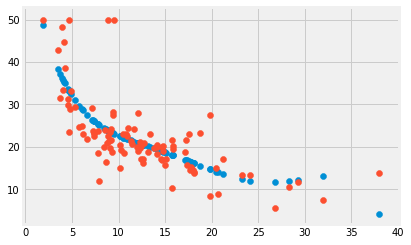

In [32]:
plt.scatter(X_test, y_pred)
plt.scatter(X_test, y_test)

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X_poly_train, y_train, cv=5, scoring=)

In [35]:
scores

array([0.74273008, 0.64639769, 0.73211377, 0.63327428, 0.72682159])